<a href="https://colab.research.google.com/github/elyorakhmat/ML_journey/blob/main/linear_reg_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Developing a simple linear regression model for sales.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Tasks:
The dataset includes data about the number of ads given by three sources (TV, Radio, and Newspaper) and the amount of sales.
1. Finding the most influential attribute to sales.
2. Developing a simple linear regression model, using the attribute.

In [4]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Task 1: finding the column.

In [6]:
# correlations
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


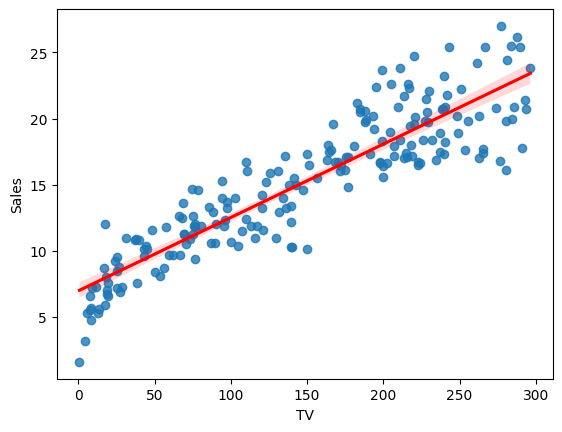

In [8]:
# visualization
sns.regplot(data= df, x= 'TV', y= 'Sales', line_kws= dict(color= 'r'))
plt.show()

# Task 2: LR model development.

In [9]:
# train-test split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size= 0.1, random_state= 42)

In [12]:
# feature and labels selection
# train set
x_train = train_set[['TV']].to_numpy()
y_train = train_set[['Sales']].to_numpy()

# test_set
x_test = test_set[['TV']].to_numpy()
y_test = test_set[['Sales']].to_numpy()

In [13]:
# model training
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

LR_model.fit(x_train, y_train)

LinearRegression()

In [14]:
# predicting
y_pred = LR_model.predict(x_test)

In [16]:
# comparison
comp_show = pd.DataFrame({'TV': x_test.flatten(), 'Prediction': y_pred.flatten(), 'Real': y_test.flatten()})
comp_show

,TV,Prediction,Real
0,163.3,16.048075,16.9
1,195.4,17.817833,22.4
2,292.9,23.193264,21.4
3,11.7,7.689968,7.3
4,220.3,19.190635,24.7
5,75.1,11.185377,12.6
6,216.8,18.997671,22.3
7,50.0,9.801548,8.4
8,222.4,19.306414,16.5
9,175.1,16.698640,16.1


In [17]:
# model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MAE = ', mae)
print('RMSE = ', rmse)

MAE =  2.037955356968121
RMSE =  2.5103822386472214
